# 음향 데이터 분석

https://www.kaggle.com/datasets/chrisfilo/urbansound8k

In [2]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import librosa.display
import IPython.display
import soundfile as sf

%matplotlib inline

C:\Users\oakyo\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [5]:
files = glob.glob('./archive/fold1/*')

In [6]:
len(files)

873

_class_map 딕셔너리를 만들어서 카테고리화를 합니다._

In [7]:
class_map = {'0' : 'air_conditioner', '1' : 'car_horn', '2' : 'children_playing', '3' : 'dog_bark', '4' : 'drilling', 
                 '5' : 'engine_idling', '6' : 'gun_shot', '7' : 'jackhammer', '8' : 'siren', '9' : 'street_music'}
pd.DataFrame(sorted(list(class_map.items())))

,0,1
0,0,air_conditioner
1,1,car_horn
2,2,children_playing
3,3,dog_bark
4,4,drilling
5,5,engine_idling
6,6,gun_shot
7,7,jackhammer
8,8,siren
9,9,street_music


_각 카테고리별 음성파일을 가지고 있는 list를 임의로 생성합니다._

In [8]:
samples = [(class_map[label], [f for f in files if f.split('-')[1] == label][0]) 
           for label in class_map.keys()]

In [9]:
samples

[('air_conditioner', './archive/fold1\\127873-0-0-0.wav'),
 ('car_horn', './archive/fold1\\156194-1-0-0.wav'),
 ('children_playing', './archive/fold1\\105415-2-0-1.wav'),
 ('dog_bark', './archive/fold1\\101415-3-0-2.wav'),
 ('drilling', './archive/fold1\\14113-4-0-0.wav'),
 ('engine_idling', './archive/fold1\\103258-5-0-0.wav'),
 ('gun_shot', './archive/fold1\\102305-6-0-0.wav'),
 ('jackhammer', './archive/fold1\\103074-7-0-0.wav'),
 ('siren', './archive/fold1\\106905-8-0-0.wav'),
 ('street_music', './archive/fold1\\108041-9-0-11.wav')]

_책에 존재하는 기존 예시와 같은 이미지가 나오도록 파일 명을 변경하였습니다._

In [13]:
samples = [('street_music', 'UrbanSound8K/audio/fold1/108041-9-0-11.wav'),
 ('engine_idling', 'UrbanSound8K/audio/fold1/103258-5-0-0.wav'),
 ('jackhammer', 'UrbanSound8K/audio/fold1/103074-7-0-0.wav'),
 ('air_conditioner', 'UrbanSound8K/audio/fold1/127873-0-0-0.wav'),
 ('drilling', 'UrbanSound8K/audio/fold1/14113-4-0-0.wav'),
 ('children_playing', 'UrbanSound8K/audio/fold1/105415-2-0-1.wav'),
 ('gun_shot', 'UrbanSound8K/audio/fold1/102305-6-0-0.wav'),
 ('siren', 'UrbanSound8K/audio/fold1/106905-8-0-0.wav'),
 ('car_horn', 'UrbanSound8K/audio/fold1/156194-1-0-0.wav'),
 ('dog_bark', 'UrbanSound8K/audio/fold1/101415-3-0-2.wav')]

In [10]:
samples

[('air_conditioner', './archive/fold1\\127873-0-0-0.wav'),
 ('car_horn', './archive/fold1\\156194-1-0-0.wav'),
 ('children_playing', './archive/fold1\\105415-2-0-1.wav'),
 ('dog_bark', './archive/fold1\\101415-3-0-2.wav'),
 ('drilling', './archive/fold1\\14113-4-0-0.wav'),
 ('engine_idling', './archive/fold1\\103258-5-0-0.wav'),
 ('gun_shot', './archive/fold1\\102305-6-0-0.wav'),
 ('jackhammer', './archive/fold1\\103074-7-0-0.wav'),
 ('siren', './archive/fold1\\106905-8-0-0.wav'),
 ('street_music', './archive/fold1\\108041-9-0-11.wav')]

get_sound_data
- _soundFile에서 원본 오디오 데이터와 샘플레이트를 가져오고 librosa에 22050 샘플레이트로 데이터를 변경합니다._
- _soundFile의 read 리턴은 (n,2)이며, librosa의 resample 입력은 (2,n)이므로 numpy transpose를 합니다._
- _axis 0 을 기준으로 average를 수행합니다. -> mono_

In [11]:
def get_sound_data(path, sr=22050):
    data, fsr = sf.read(path)
    data_22k = librosa.resample(data.T, fsr, sr)
    if len(data_22k.shape) > 1:
        data_22k = np.average(data_22k, axis=0)
    return data_22k, sr

In [12]:
sample_data = [(sample[0], get_sound_data(sample[1])) for sample in samples]

C:\Users\oakyo\AppData\Local\Temp\ipykernel_10352\3056204792.py:3: FutureWarning: Pass orig_sr=48000, target_sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data_22k = librosa.resample(data.T, fsr, sr)
C:\Users\oakyo\AppData\Local\Temp\ipykernel_10352\3056204792.py:3: FutureWarning: Pass orig_sr=44100, target_sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data_22k = librosa.resample(data.T, fsr, sr)
C:\Users\oakyo\AppData\Local\Temp\ipykernel_10352\3056204792.py:3: FutureWarning: Pass orig_sr=48000, target_sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  data_22k = librosa.resample(data.T, fsr, sr)


In [13]:
[(sample[0], sample[1][0].shape) for sample in sample_data]

[('air_conditioner', (44982,)),
 ('car_horn', (5513,)),
 ('children_playing', (88200,)),
 ('dog_bark', (88200,)),
 ('drilling', (88200,)),
 ('engine_idling', (88200,)),
 ('gun_shot', (57551,)),
 ('jackhammer', (88200,)),
 ('siren', (88200,)),
 ('street_music', (88200,))]

In [14]:
for data in sample_data:
    print(data[0], ':')
    IPython.display.display(IPython.display.Audio(data=data[1][0], rate=data[1][1]))

air_conditioner :


car_horn :
children_playing :


dog_bark :


drilling :


engine_idling :


gun_shot :


jackhammer :


siren :


street_music :


_monophonic sound의 진폭을 표시합니다._

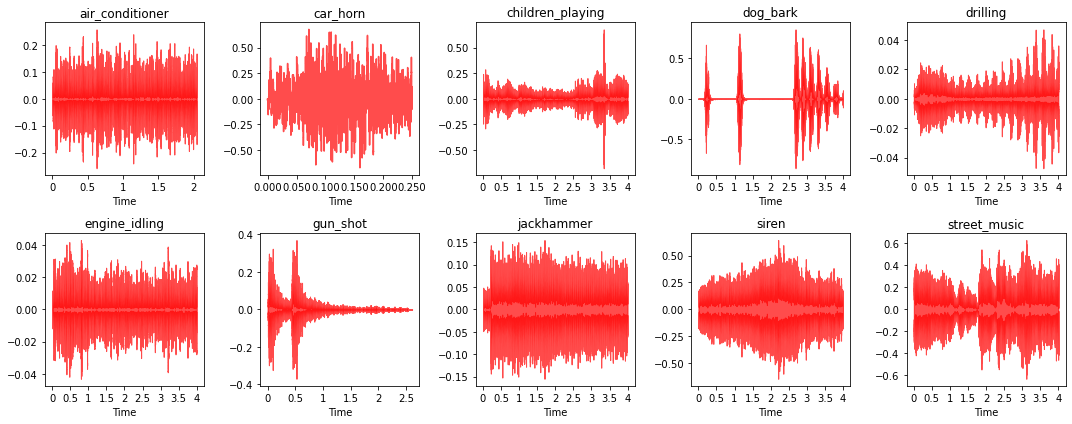

In [16]:
i = 1
fig = plt.figure(figsize=(15, 6))
for item in sample_data:
    plt.subplot(2, 5, i)
    librosa.display.waveshow(item[1][0], sr=item[1][1], color='r', alpha=0.7)
    plt.title(item[0])
    i += 1
plt.tight_layout()

_spectrogram을 그린다. Fs는 샘플레이트로 푸리에계산에 사용됩니다.(alias)_

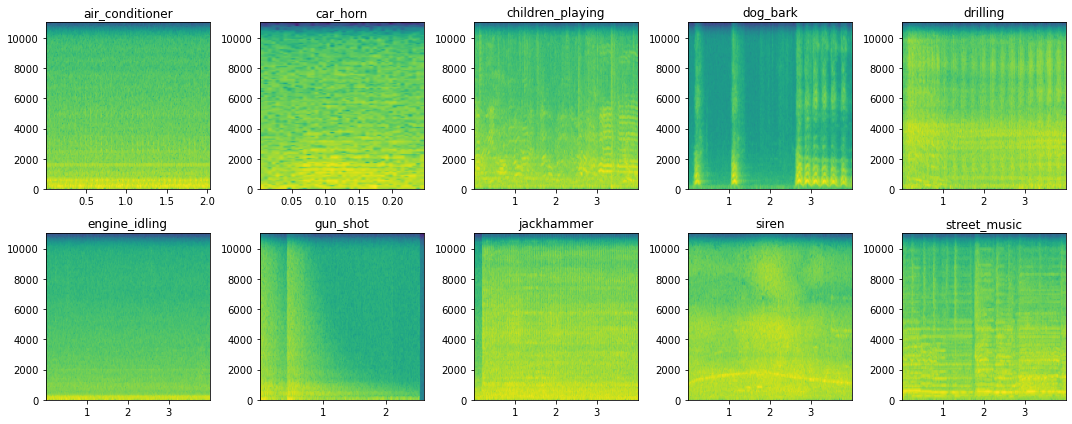

In [17]:
i = 1
fig = plt.figure(figsize=(15, 6))
for item in sample_data:
    plt.subplot(2, 5, i)
    specgram(item[1][0], Fs=item[1][1])
    plt.title(item[0])
    i += 1
plt.tight_layout()

- _melspectrogram을 구합니다._
- _기존의 logamplitude 메소드가 amplitude_to_db로 변경되었습니다._

C:\Users\oakyo\AppData\Local\Temp\ipykernel_10352\1246937587.py:5: FutureWarning: Pass y=[ 0.00080629 -0.00325045 -0.00488509 ... -0.06248173 -0.05877882
 -0.06607738] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(item[1][0], sr=item[1][1], n_mels=128)
C:\Users\oakyo\AppData\Local\Temp\ipykernel_10352\1246937587.py:5: FutureWarning: Pass y=[-0.00144512 -0.00652427 -0.01890192 ... -0.0342516   0.0570336
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(item[1][0], sr=item[1][1], n_mels=128)
C:\Users\oakyo\AppData\Local\Temp\ipykernel_10352\1246937587.py:5: FutureWarning: Pass y=[0.06448548 0.07722735 0.06370885 ... 0.14147653 0.11794212 0.10937031] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(item[1][0], sr=item[1][1

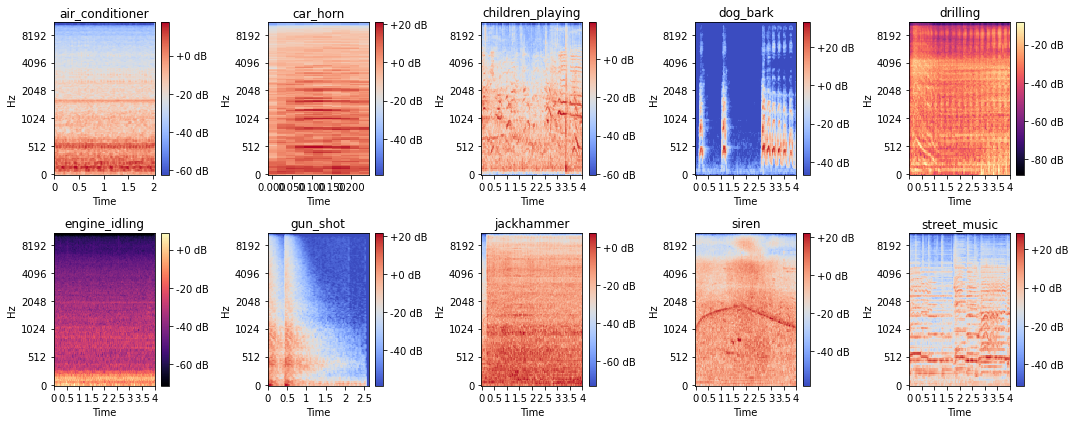

In [18]:
i = 1
fig = plt.figure(figsize=(15, 6))
for item in sample_data:
    plt.subplot(2, 5, i)
    S = librosa.feature.melspectrogram(item[1][0], sr=item[1][1], n_mels=128)
    log_S = librosa.amplitude_to_db(S**(1/2))
    librosa.display.specshow(log_S, sr=item[1][1], x_axis='time', y_axis='mel')
    plt.title(item[0])
    plt.colorbar(format='%+02.0f dB')
    i += 1
plt.tight_layout()

In [19]:
y, sr = sample_data[6][1]

C:\Users\oakyo\AppData\Local\Temp\ipykernel_10352\2531581166.py:1: FutureWarning: Pass y=[2.02119653e-05 5.00241372e-04 1.01596203e-03 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=22050, n_mels=128)


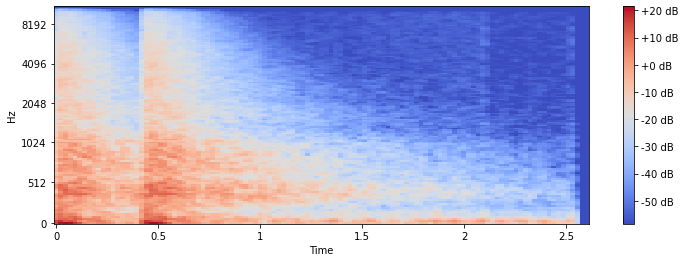

In [20]:
S = librosa.feature.melspectrogram(y, sr=22050, n_mels=128)
log_S = librosa.amplitude_to_db(S**(1/2))
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=22050, x_axis='time', y_axis='mel')
plt.colorbar(format='%+02.0f dB')

_harmonic과 percussive를 구분합니다._

In [21]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

- _gun shot을 harmonic, percussive로 구분한 후 db로 나타낸 그래프를 표시합니다._
- _총소리의 박자와 음이 구분됩니다._

C:\Users\oakyo\AppData\Local\Temp\ipykernel_10352\514490141.py:1: FutureWarning: Pass y=[ 5.97789436e-03  6.05033970e-03  6.51906382e-03 ...  1.77413208e-10
 -6.12298701e-11  2.99997491e-10] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=22050, n_mels=128)
C:\Users\oakyo\AppData\Local\Temp\ipykernel_10352\514490141.py:2: FutureWarning: Pass y=[-5.95768239e-03 -5.55009833e-03 -5.50310179e-03 ... -1.77413208e-10
  6.12298701e-11 -2.99997491e-10] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S_percussive = librosa.feature.melspectrogram(y_percussive, sr=22050)


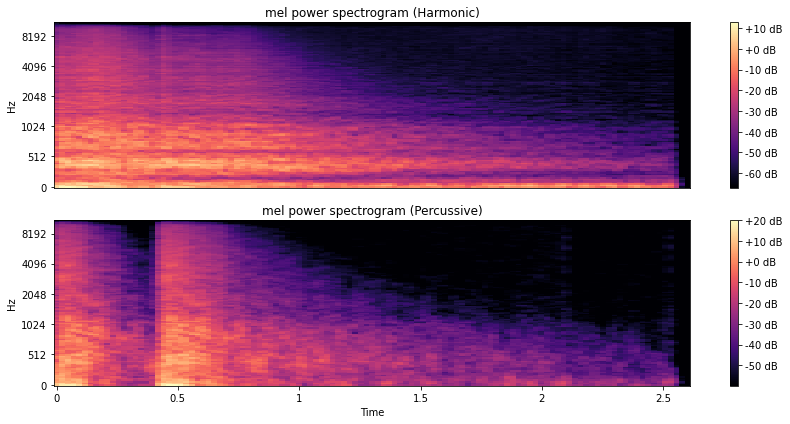

In [22]:
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=22050, n_mels=128)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=22050)
log_Sh = librosa.power_to_db(S_harmonic)
log_Sp = librosa.power_to_db(S_percussive)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')
plt.title('mel power spectrogram (Harmonic)')
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram (Percussive)')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

C:\Users\oakyo\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=900
  return f(*args, **kwargs)


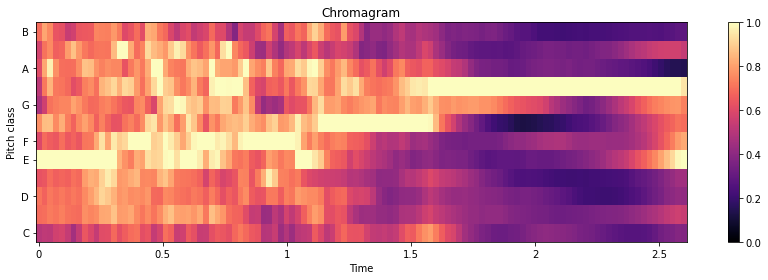

In [23]:
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Make a new figure
plt.figure(figsize=(12, 4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()